In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
from tqdm.notebook import tqdm

In [3]:
path_users = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/users/"
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

In [3]:
users_files = glob.glob(path_users + "*.csv")
df = pd.DataFrame()
for file in tqdm(users_files):
    df = pd.concat([df,pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)],  ignore_index=True)
df.drop_duplicates(subset=["id"],keep="last", inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df["not_found"].unique()

array([nan, False, True], dtype=object)

In [44]:
df.columns

Index(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url',
       'protected', 'followers_count', 'friends_count', 'listed_count',
       'created_at', 'favourites_count', 'geo_enabled', 'verified',
       'statuses_count', 'contributors_enabled', 'default_profile',
       'default_profile_image', 'not_found', 'code', 'message\r'],
      dtype='object')

In [43]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

good_lst = list(pd.read_csv(path + "good.csv")["screen_name"])
bad_lst = list(pd.read_csv(path + "bad.csv")["screen_name"])

good_rt_lst = list(pd.read_csv(path_df + "good_rt.csv")["screen_name"])
bad_rt_lst = list(pd.read_csv(path_df + "bad_rt.csv") ["screen_name"])

In [48]:
# lst = []
# for row in tqdm(df.itertuples()):
#     if row.screen_name in bad_rt_lst:
#         lst.append(row.location)
# locations = pd.Series(lst).dropna()
locations.value_counts().sort_values(ascending=False)

Italia                          536
Roma, Lazio                     222
Milano, Lombardia               166
Italy                           157
Roma                            150
                               ... 
Italia (terra meravigliosa)       1
Santa Teresa di Riva-Sicilia      1
Roma, Italia 🇮🇹                   1
Eretta                            1
Atlantide                         1
Length: 3196, dtype: int64

In [53]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="gianluca.nogara@gmail.com")
location = []
latitude = []
longitude = []
number = []
coordinates = []
count = []
location = list(locations.value_counts().sort_values(ascending=False).keys())
number = list(locations.value_counts().sort_values(ascending=False).values)

                    
#Traduzione degli indirizzi in località e rimozione delle località non valide
for i in tqdm(range(len(location))):
    try:
        coordinates = geolocator.geocode(location[i])
        if(coordinates != None):
            if((not coordinates.latitude in latitude) and (not coordinates.longitude in longitude)):
                latitude.append(coordinates.latitude)
                longitude.append(coordinates.longitude)
                count.append(number[i])
    except Exception as e:
        print(e)
#Creazione dataframe con coordinate e numero di lanci
dataf = pd.DataFrame(
                            {'Latitude': latitude,
                            'Longitude': longitude,
                            'number' : count})

HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=San+Jose%2C+CA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=UAE_d-_-b_ITALY&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=A&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=En+La+Banana+Republik&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSCon

In [54]:
#Inizializzazione mappa
px.set_mapbox_access_token("open-street-map")

#Inserimento dei dati dal dataframe
fig1= px.scatter_geo(dataf, lat=dataf.Latitude, lon=dataf.Longitude)
fig = px.scatter_mapbox(dataf,
                            lat=dataf.Latitude,
                            lon=dataf.Longitude,
                            mapbox_style="open-street-map",
                            size="number",
                            zoom = 1)

#Visualizzazione grafica della mappa
fig.show()

# Suspended

In [2]:
tweets = pd.read_parquet(r"..\files\tweets\tweets.parquet", engine="fastparquet")

In [3]:
suspended_files = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Italian/script_directory_output/suspended_users/out*.csv")
df = pd.DataFrame()
for file in suspended_files:
    temp = pd.read_csv(file, lineterminator="\n", encoding="utf-8", low_memory=False)
    df = df.append(temp)
df.drop_duplicates(subset=["name"], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,name,status
0,marzia38580873,"[{'code': 50, 'message': 'User not found.'}]"
1,Ivan__soli,ok
2,pat09_04,"[{'code': 50, 'message': 'User not found.'}]"
3,claudeger55,ok
4,ennioflyano,ok


In [4]:
lst_suspended = df[df["status"].str.contains("code")]
lst_suspended

,name,status
0,marzia38580873,"[{'code': 50, 'message': 'User not found.'}]"
2,pat09_04,"[{'code': 50, 'message': 'User not found.'}]"
12,Alien1it,"[{'code': 63, 'message': 'User has been suspen..."
13,maxok07,"[{'code': 63, 'message': 'User has been suspen..."
22,nicolaf_,"[{'code': 50, 'message': 'User not found.'}]"
...,...,...
305240,dylansmysoul2,"[{'code': 50, 'message': 'User not found.'}]"
305241,more_worlds,"[{'code': 63, 'message': 'User has been suspen..."
305246,MarcoMad12,"[{'code': 63, 'message': 'User has been suspen..."
305247,luddynski,"[{'code': 63, 'message': 'User has been suspen..."


In [5]:
tweets = tweets[tweets["user_screen_name"].isin(list(lst_suspended["name"]))]
tweets.head()

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
9,1221739566832537600,1221739566832537600,Mon Jan 27 10:19:46 +0000 2020,1169402458424168448,pakkiola,False,Thu Sep 05 00:11:42 +0000 2019,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
27,1221737867510153216,1221737867510153216,Mon Jan 27 10:13:01 +0000 2020,1073339297355456512,Primula23244790,False,Thu Dec 13 22:10:04 +0000 2018,@gzibordi @GonnelliLuca Intanto è arrivato al ...,"<a href=""http://twitter.com/download/iphone"" r...",None,...,None,[],[],"[{'screen_name': 'gzibordi', 'name': 'Giovanni...",[],[],[],NaN,NaN,NaN
46,1221735972259401729,1221735972259401729,Mon Jan 27 10:05:29 +0000 2020,397184850,RTonyi,False,Mon Oct 24 10:50:44 +0000 2011,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",None,...,None,[],[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN
69,1221733053044862976,1221733053044862976,Mon Jan 27 09:53:53 +0000 2020,1073339297355456512,Primula23244790,False,Thu Dec 13 22:10:04 +0000 2018,@eterea_naive E a favore dei vaccini ?,"<a href=""http://twitter.com/download/iphone"" r...",None,...,None,[],[],[],[],[],[],NaN,NaN,NaN
71,1221729963486957568,1221729963486957568,Mon Jan 27 09:41:36 +0000 2020,1073339297355456512,Primula23244790,False,Thu Dec 13 22:10:04 +0000 2018,@Fabrizi65575983 @hollygo666 Per forza ! Hanno...,"<a href=""http://twitter.com/download/iphone"" r...",None,...,None,[],[],"[{'screen_name': 'Fabrizi65575983', 'name': 'F...",[],[],[],NaN,NaN,NaN


In [6]:
len(tweets)

315738

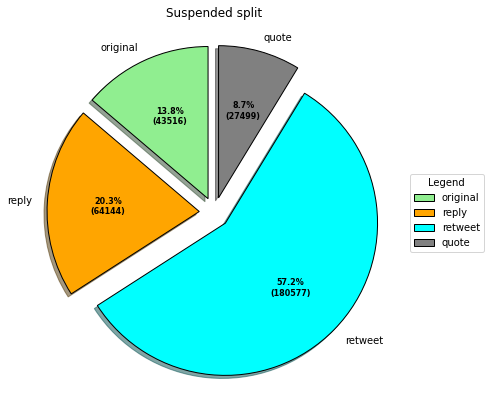

In [7]:
splitted = utils.split(tweets)
labels = list(splitted.keys())
values = list(splitted.values())
utils.print_pie_chart4("Suspended split", labels, values)

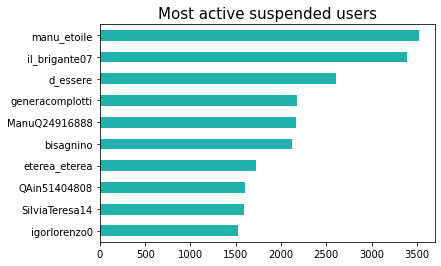

In [8]:
val = tweets["user_screen_name"].value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='lightseagreen') #red #darkturquoise
ax.set_title('Most active suspended users', fontsize=15)
ax.invert_yaxis()
plt.show()

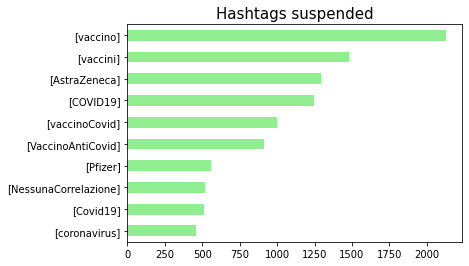

In [9]:
val = pd.Series(utils.hashtag_process_list(tweets["hashtags"])).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[1:11].plot(kind='barh', color='lightgreen') #red #darkturquoise
ax.set_title('Hashtags suspended', fontsize=15)
ax.invert_yaxis()
plt.show()

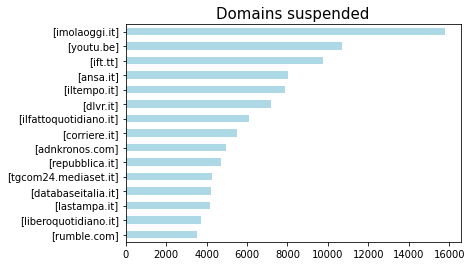

In [10]:
val = pd.Series(utils.extract_domain_list(tweets)).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[2:17].plot(kind='barh', color='lightblue') #red #darkturquoise
ax.set_title('Domains suspended', fontsize=15)
ax.invert_yaxis()
plt.show()

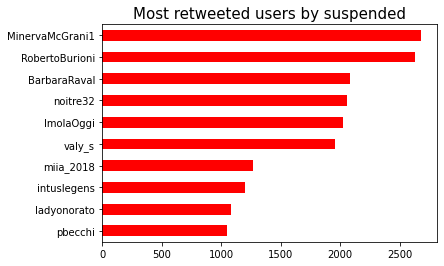

In [11]:
val = pd.Series(tweets["rt_user_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='red') #red #darkturquoise
ax.set_title('Most retweeted users by suspended', fontsize=15)
ax.invert_yaxis()
plt.show()

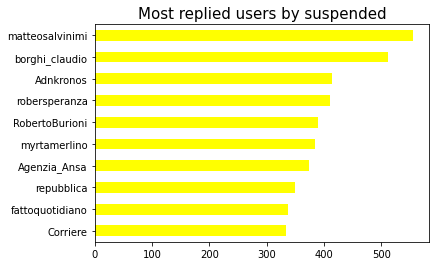

In [13]:
val = pd.Series(tweets["in_reply_to_screen_name"]).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:10].plot(kind='barh', color='yellow') #red #darkturquoise
ax.set_title('Most replied users by suspended', fontsize=15)
ax.invert_yaxis()
plt.show()